<a href="https://colab.research.google.com/github/Ahmed-AbdElRhman/GPProject/blob/main/implicit_motive_AchPowAff_German.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Reading And Assess Data**

## **Read Files**

In [ ]:
import pandas as pd

In [ ]:
OriginalDataPATH = '/content/drive/MyDrive/Data/German_Data/DatasetArAllTranslated_Mod.csv'
EnglishDatasetPATH = '/content/drive/MyDrive/Data/Datasets/CheckPoint/ProcessedDuplicatedDataFrame/dupPowAchAffCleaned_df.csv'
arabicEmojisPath = "/content/drive/MyDrive/Data/arabicEmojis.csv"

In [ ]:
originalData_df = pd.read_csv(OriginalDataPATH)
originalData_df.shape

In [ ]:
#English Dataset
English_df = pd.read_csv('/content/drive/MyDrive/Data/Datasets/CheckPoint/ProcessedDuplicatedDataFrame/dupPowAchAffCleaned_df.csv')
English_df

,Text,Pow,Ach,Aff,processed_text
0,استمع لها واستمعت له.,0,0,1,استمع لها واستمعت له
1,وقالت انها فوجئت أنها قادرة على إجراء هذه المك...,0,0,1,وقالت انها فوجئت أنها قادرة على إجراء هذه المك...
2,هذه هي التحديثات كبيرة.... جيف,0,1,0,هذه هي التحديثات كبيرة جيف
3,بعد انتهاء الدرس ، اقترح عليها أن تمشي معًا.,0,0,1,بعد انتهاء الدرس اقترح عليها أن تمشي معا
4,هم ليسوا متزوجين ولكن عشاق.,0,0,1,هم ليسوا متزوجين ولكن عشاق
...,...,...,...,...,...
117095,لذلك ، يجلسون اليوم على ضفة النهر ، في محاولة ...,0,0,1,لذلك يجلسون اليوم على ضفة النهر في محاولة لحل ...
117096,ويجادل قبطان السفينة مع مفتش الشرطة بأن طاقم ا...,1,0,0,ويجادل قبطان السفينة مع مفتش الشرطة بأن طاقم ا...
117097,أنا أحب (سيندي) أيضاً إنها تبدو رائعة بالنسبة لي,0,0,1,أنا أحب سيندي أيضا إنها تبدو رائعة بالنسبة لي
117098,ستظهر في جميع التقارير الإخبارية التلفزيونية أ...,1,0,0,ستظهر في جميع التقارير الإخبارية التلفزيونية أ...


In [ ]:
df_emojis = pd.read_csv(arabicEmojisPath)
df_emojis.shape

(4159, 2)

## **Assessing and Clean Data**

In [ ]:
#Assess
originalData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146819 entries, 0 to 146818
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   pow          146819 non-null  int64 
 1   ach          146819 non-null  int64 
 2   aff          146819 non-null  int64 
 3   text         146819 non-null  object
 4   arabic_text  146819 non-null  object
dtypes: int64(3), object(2)
memory usage: 5.6+ MB


In [ ]:
#Assess
print("Original Dataset has duplicated Data!::\n",originalData_df.duplicated().any())

Original Dataset has duplicated Data!::
 True


In [ ]:
#Assess
print("'non' Values Summary:")
print(originalData_df.isna().sum())

'non' Values Summary:
pow            0
ach            0
aff            0
text           0
arabic_text    0
dtype: int64


In [ ]:
#Clean Drop Duplicates
originalData_df = originalData_df.drop_duplicates()
#Assess
print("Original Dataset has duplicated Data!::\n",originalData_df.duplicated().any())

Original Dataset has duplicated Data!::
 False


### **Clean data**

In [ ]:
#Splite data to 1 and  0 
df000 = originalData_df.query('pow == 0 & ach == 0 & aff == 0')
df000 = df000.drop_duplicates()
df000.shape

(89418, 5)

In [ ]:
df111 = originalData_df.query('pow == 1 | ach == 1 | aff == 1')
df111 = df111.drop_duplicates()
df111.shape

(56343, 5)

In [ ]:
# dupPowAchAff_df[dupPowAchAff_df.processed_text.str.len()==4].reset_index(drop=True)
df111 = df111[df111['arabic_text'].map(len) >3 ].reset_index(drop=True)
df111.shape

(56326, 5)

In [ ]:
#Drop Sentence that has 2 words
def clear(text):
  if len(text)<6:
    return 0
  if len(nltk.word_tokenize(text))<3:
    return 0
  return 1
df000 = df000[df000['arabic_text'].map(clear) == 1 ].reset_index(drop=True)
df000.shape

(87517, 5)

In [ ]:
originalData_df = df111.append(df000)
originalData_df = originalData_df.sample(frac=1).reset_index(drop=True)
originalData_df.shape

(143843, 5)

### **Assess Data**

In [ ]:
import matplotlib.pyplot as plt
import nltk
from nltk import WordPunctTokenizer
nltk.download('punkt')

In [ ]:
label = ['pow','ach','aff']

[87517, 56326]


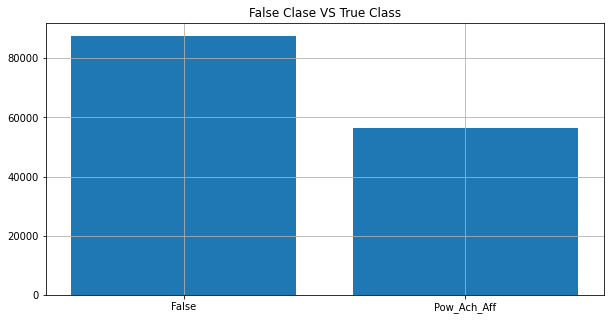

In [ ]:
#Assess
print([df000.shape[0],df111.shape[0]])
fig, axes = plt.subplots( figsize=(10, 5))
axes.bar(['False','Pow_Ach_Aff'], [df000.shape[0],df111.shape[0]]);
axes.set_title('False Clase VS True Class')
axes.grid()
del df000
del df111

(143843, 5)


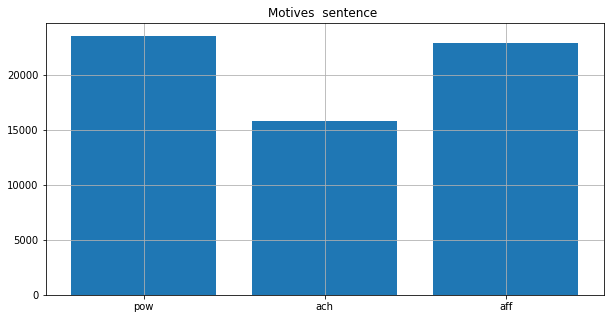

In [ ]:
#Assess
print(originalData_df.shape)
fig, axes = plt.subplots( figsize=(10, 5))
axes.bar(label, originalData_df[label].sum());
axes.set_title('Motives  sentence ')
axes.grid()

In [ ]:
#Valuse As A binary Class Each Class  With its own 0 and 1 From its own Values regardless of the  other Classes
fig, axes = plt.subplots(3, 1, figsize=(10, 8))
i = 0
# j = 0
for l in label: #['Pow','Ach','Aff']
  ax = axes[i]
  indexValues = []
  # filterddf = originalData_df.query(label[index[j]]+' != 1 & '+label[index[j+1]]+' != 1 ')
  filterddf = originalData_df
  for v in filterddf.set_index(label).count(level=label[i]).index.values:                 #[0,1]
    indexValues.append(str(v))
  values = filterddf.set_index(label).count(level=label[i]).text.values
  ax.bar(indexValues, values, color=['red', 'green']);
  percentage =  format((values[1]/values[0]), '0.1%')
  ax.set_title(filterddf.set_index(label).count(level=label[i]).index.name+" "+str(percentage)+" From its own Values regardless of the other Classes")
  ax.grid()
  print(filterddf.set_index(label).count(level=label[i]))
  i+=1
  # j+=2
del filterddf

       text  arabic_text
pow                     
0    120325       120325
1     23518        23518
       text  arabic_text
ach                     
0    128074       128074
1     15769        15769
       text  arabic_text
aff                     
0    120949       120949
1     22894        22894


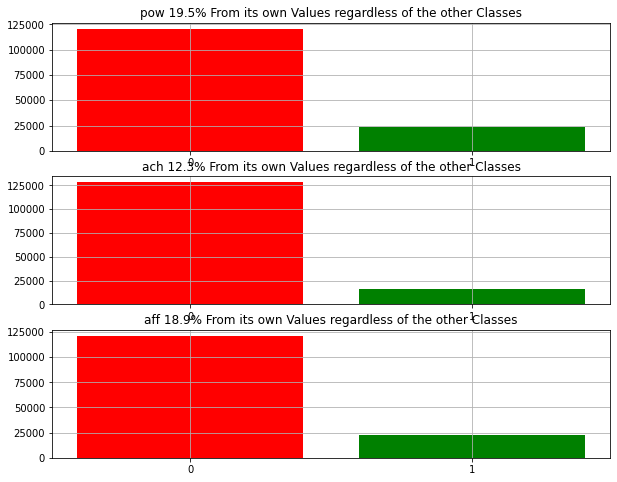

In [ ]:
#Valuse As A binary Class Each Class  With its own 0 and 1 From its own Values regardless of the  other Classes
fig, axes = plt.subplots(3, 1, figsize=(10, 8))
i = 0
# j = 0
for l in label: #['Pow','Ach','Aff']
  ax = axes[i]
  indexValues = []
  # filterddf = originalData_df.query(label[index[j]]+' != 1 & '+label[index[j+1]]+' != 1 ')
  filterddf = originalData_df
  for v in filterddf.set_index(label).count(level=label[i]).index.values:                 #[0,1]
    indexValues.append(str(v))
  values = filterddf.set_index(label).count(level=label[i]).text.values
  ax.bar(indexValues, values, color=['red', 'green']);
  percentage =  format((values[1]/values[0]), '0.1%')
  ax.set_title(filterddf.set_index(label).count(level=label[i]).index.name+" "+str(percentage)+" From its own Values regardless of the other Classes")
  ax.grid()
  print(filterddf.set_index(label).count(level=label[i]))
  i+=1
  # j+=2
del filterddf

      text  arabic_text
pow                    
0    87517        87517
1    23518        23518
      text  arabic_text
ach                    
0    87517        87517
1    15769        15769
      text  arabic_text
aff                    
0    87517        87517
1    22894        22894


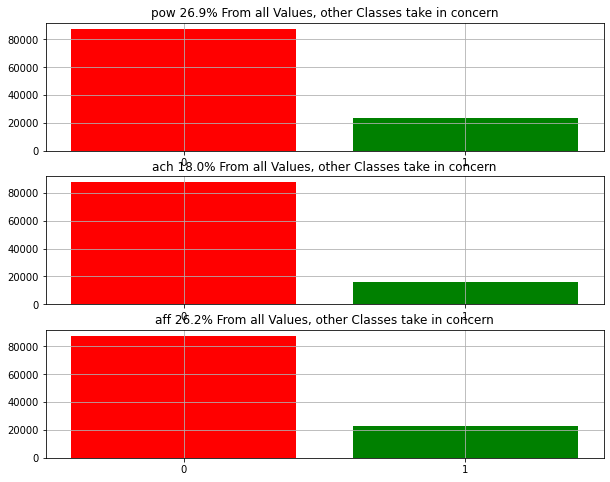

In [ ]:
#From all Values, other Classes take in concern
fig, axes = plt.subplots(3, 1, figsize=(10, 8))
i = 0
for l in label: #['Pow','Ach','Aff']
  ax = axes[i]
  indexValues = []
  filterddf = originalData_df.query('(pow==0 & ach==0 & aff==0)'+' | ('+label[i]+' == 1)')
  for v in filterddf.set_index(label).count(level=label[i]).index.values:                 #[0,1]
    indexValues.append(str(v))
  values = filterddf.set_index(label).count(level=label[i]).text.values
  ax.bar(indexValues, values, color=['red', 'green']);
  percentage =  format((values[1]/values[0]), '0.1%')
  ax.set_title(filterddf.set_index(label).count(level=label[i]).index.name+" "+str(percentage)+" From all Values, other Classes take in concern")
  ax.grid()
  print(filterddf.set_index(label).count(level=label[i]))
  i+=1
del filterddf

In [ ]:
#Assess
def clean_and_tokenize(text):
    return nltk.word_tokenize(text)

sequences = originalData_df.apply(lambda row: clean_and_tokenize(row['arabic_text']), axis=1)

In [ ]:
print(sequences.iloc[0])

['زوجان', 'شابان', 'قادمان', 'للتو', 'من', 'نزهة', 'عبر', 'المدينة', '.']


In [ ]:
df000 = originalData_df.query('pow == 0 & ach == 0 & aff == 0')
df000 = df000.drop_duplicates()
df000.shape

(85594, 6)

In [ ]:
#Assess
def clean_and_tokenize(text):
    return nltk.word_tokenize(text)

sequences = df000.apply(lambda row: clean_and_tokenize(row['arabic_text']), axis=1)

In [ ]:
print(sequences.iloc[0])

['العودة', 'إلى', 'المنزل', 'وحدها', 'ليست', 'خيارا', 'لأحد', 'اليوم', '.']


In [ ]:
sequences.str.len().quantile([0.02, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99])

0.02     3.0
0.10     5.0
0.20     6.0
0.30     7.0
0.50    10.0
0.60    11.0
0.70    13.0
0.80    15.0
0.90    19.0
0.95    22.0
0.99    30.0
dtype: float64

In [ ]:
i = 0
for len in sequences.str.len().values:
  if len >6 and len<9:
    i+=1
print(i)

14000


In [ ]:
sequences.str.len().quantile([0.02, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99])

0.02     3.0
0.10     5.0
0.20     6.0
0.30     8.0
0.50    11.0
0.60    12.0
0.70    14.0
0.80    17.0
0.90    21.0
0.95    24.0
0.99    33.0
dtype: float64

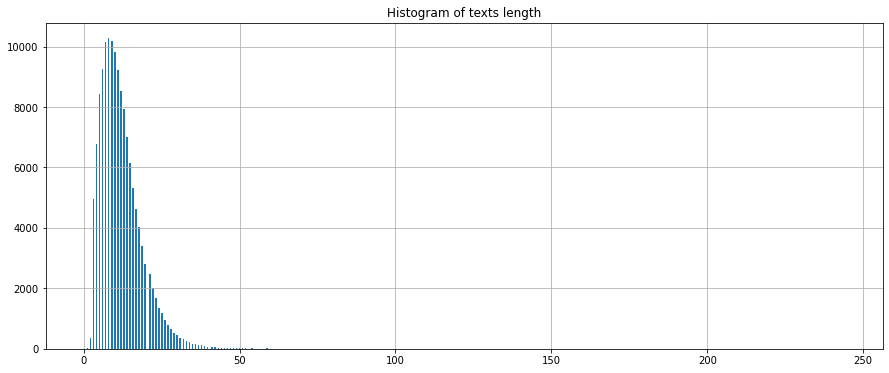

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
sequences.str.len().hist(bins=500, ax=ax)
ax.set_title('Histogram of texts length');

In [ ]:
#Asess MultiCass

# **Data Preprocessing**

In [ ]:
import re

In [ ]:
ARABIC_DIACRITiCSC = ['ِ', 'ُ', 'ٓ', 'ٰ', 'ْ', 'ٌ', 'ٍ', 'ً', 'ّ', 'َ','°','ـ']
# RESERVE            = [ '#','0', '1', '2', '3', '4', '5', '6', '7', '9', '¤',
#                        '«', '°', '»', '×', 'é', 'í', 'ö', 'ş', 'ɹ', '˚', '˛', '̈', '̣',
#                        '̤','\u200b', '\u200c', '\u200d', '\u200e', '\u200f', '‘',
#                        '’', '“', '”', '•', '…', '\u2066', '\u2067', '\u2069', '⃣',
#                        '║', '❖', '⥂', '珞', '\ue105', '\ue30c','\U0001f9b0',
#                        '\uf33a', '\uf381', '\uf602','🏻', '🏼', '🏽', '🏿','🏾', '\U000fe323', '\U000fe330',
#                        '\U000fe334', '\U000fe335', '\U000fe340']
RESERVE            = [ '#', '¤',
                       '«', '°', '»', '×', 'é', 'í', 'ö', 'ş', 'ɹ', '˚', '˛', '̈', '̣',
                       '̤','\u200b', '\u200c', '\u200d', '\u200e', '\u200f', '‘',
                       '’', '“', '”', '•', '…', '\u2066', '\u2067', '\u2069', '⃣',
                       '║', '❖', '⥂', '珞', '\ue105', '\ue30c','\U0001f9b0',
                       '\uf33a', '\uf381', '\uf602','🏻', '🏼', '🏽', '🏿','🏾', '\U000fe323', '\U000fe330',
                       '\U000fe334', '\U000fe335', '\U000fe340']
PUNCTUATIONS = '"#%&\'()*+,-./:;<=>@[\\]^_`{|}~،$!?÷؟' 


In [ ]:
'''
Clear Hashtags
Remove Links
Remove Punctuations
remove English 
remove Numbers
Remove Arabic diacritics
Translate emojis
Remove RESERVE
Substituting Single Char with single space(Ex:' s ','s ')
Substituting multiple spaces with single space
'''
def Preprocess_textWithEmojisTranslated_LitePunctuations(text):
    #Clear Hashtags
    text = re.sub(r"#(\w+|[\sء-ي]+)",' ', text)
    #Remove Links
    regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
    text = re.sub(regex,'' ,text)
    #Remove Punctuations
    text = re.compile('[%s]' % re.escape(PUNCTUATIONS)).sub(' ', text)
    #remove English 
    text = re.sub(r'[A-Za-z]+',' ' ,text)
    #remove Numbers 
    text = re.sub(r'[0-9]+',' ' ,text)
    emojiList = df_emojis.emoji.values
    #Remove Arabic diacritics
    cleanned_diacriticstext = ''
    for char in text:
        if char in ARABIC_DIACRITiCSC:
            continue
        else:
            cleanned_diacriticstext+=char   
    #Translate emojis          
    cleanned_text = ''
    for char in cleanned_diacriticstext:
        if char in emojiList:
            try:
                cleanned_text += ' '
                cleanned_text += df_emojis[df_emojis.emoji == char].values[0][1]
                cleanned_text += ' '
            except :
                pass
        else:
            cleanned_text+=char
    #Remove RESERVE      
    cleanned_reservetext = ''
    for char in cleanned_text:
        if char in RESERVE:
            continue
        else:
            cleanned_reservetext+=char


    #Substituting Single Char with single space      
    cleanned_reservetext = re.sub(r'\s+[؀-ۿ1-9]\s+',' ',cleanned_reservetext) #' s '
    cleanned_reservetext = re.sub(r'^[؀-ۿ1-9]\s+',' ',cleanned_reservetext)   #'s '
    # Substituting multiple spaces wit single space
    cleanned_reservetext  = re.sub(r'\s+',' ',cleanned_reservetext, flags=re.I)
    
    return cleanned_reservetext

In [ ]:
originalData_df['processed_Artext'] = originalData_df.arabic_text.apply(lambda x : Preprocess_textWithEmojisTranslated_LitePunctuations(x))
originalData_df.head()

,pow,ach,aff,text,arabic_text,processed_Artext
0,0,0,1,Ein junges Paar kommt gerade von einem Spazier...,زوجان شابان قادمان للتو من نزهة عبر المدينة.,زوجان شابان قادمان للتو من نزهة عبر المدينة
1,0,0,1,"er schrieb nie, telefonierte selten und besuch...",انه لم يكتب ، ونادرا ما اتصل به وزاره أقل من ذ...,انه لم يكتب ونادرا ما اتصل به وزاره أقل من ذلك...
2,0,0,1,"Er freut sich schon darauf, sie bald wieder zu...",وهو يتطلع إلى رؤيتها مرة أخرى قريبا.,وهو يتطلع إلى رؤيتها مرة أخرى قريبا
3,0,0,0,Beide Laborantinnen wirken sehr angespannt und...,يبدو كل من فنيي المختبر متوترين للغاية ويرغبون...,يبدو كل من فنيي المختبر متوترين للغاية ويرغبون...
4,0,0,0,"Puh, wenn da welche waren, frag die NSA.",بوه، إذا كان هناك أي، اسأل وكالة الأمن القومي.,بوه إذا كان هناك أي اسأل وكالة الأمن القومي


In [ ]:
#Splite data to 1 and  0 
df000 = originalData_df.query('pow == 0 & ach == 0 & aff == 0')
df000 = df000.drop_duplicates()
df000.shape

(85594, 6)

In [ ]:
df111 = originalData_df.query('pow == 1 | ach == 1 | aff == 1')
df111 = df111.drop_duplicates()
df111.shape

(56326, 6)

In [ ]:
#Drop Sentence that has 2 words
def clear(text):
  if len(text)<6:
    return 0
  if len(nltk.word_tokenize(text))<3:
    return 0
  return 1
df000 = df000[df000['processed_Artext'].map(clear) == 1 ].reset_index(drop=True)
df000.shape

(85594, 6)

In [ ]:
originalData_df = df111.append(df000)
originalData_df = originalData_df.sample(frac=1).reset_index(drop=True)
originalData_df.shape

(141920, 6)

In [ ]:
del df000
del df111

In [ ]:
#Check Point 
originalData_df.to_csv (r'/content/drive/MyDrive/Data/German_Data/OreginalDataset/CleanedGermanDataset.csv', index = False)

# **CheckPoint**

In [2]:
MergedGerEnDatasetPATH   = '/content/drive/MyDrive/Data/German_Data/OreginalDataset/MergedGerEnDataset.csv'
GerDatasetPath           = '/content/drive/MyDrive/Data/German_Data/OreginalDataset/CleanedGermanDataset.csv'
MergedUD2_Germ5000RowPATH = '/content/drive/MyDrive/Data/German_Data/OreginalDataset/MergedUD2_Germ5000Row.csv'
UD2_Drop5000RowPATH       = '/content/drive/MyDrive/Data/German_Data/OreginalDataset/UD2_Drop5000Row.csv'

In [3]:
import pandas as pd

In [4]:
#read File
MergedUD2_Germ5000Row_df = pd.read_csv(MergedUD2_Germ5000RowPATH)
MergedUD2_Germ5000Row_df.shape

(146920, 5)

In [5]:
#read File
UD2_Drop5000Row_df = pd.read_csv(UD2_Drop5000RowPATH)
UD2_Drop5000Row_df.shape

(23686, 5)

In [ ]:
#read File
originalData_df = pd.read_csv(GerDatasetPath)
originalData_df.shape

(141920, 6)

# **Merge Some of English Data**

In [ ]:
import random

In [ ]:
UD1PATH = '/content/drive/MyDrive/Data/German_Data/UD1.csv'
UD2PATH = '/content/drive/MyDrive/Data/German_Data/UD2.csv'
UD3PATH = '/content/drive/MyDrive/Data/German_Data/UD3.csv'

In [ ]:
UD2_df = pd.read_csv(UD2PATH)
UD2_df.shape

(28686, 5)

In [ ]:
UD2_df.columns

Index(['pow', 'ach', 'aff', 'arabic_text', 'processed_Artext'], dtype='object')

In [ ]:
originalData_df = originalData_df.drop(columns=['text'])
originalData_df.columns

Index(['pow', 'ach', 'aff', 'arabic_text', 'processed_Artext'], dtype='object')

In [ ]:
randomIndexList = random.sample(range(0, UD2_df.shape[0]), 5000)
print(randomIndexList)

[22974, 48, 9122, 1919, 13509, 4732, 24145, 7938, 10053, 26478, 172, 28182, 388, 27440, 12101, 20079, 6062, 14912, 7032, 27248, 16576, 24172, 9998, 8746, 21968, 6188, 17107, 3089, 15886, 28405, 8593, 18219, 10338, 6386, 24965, 21906, 26278, 25143, 22024, 18849, 8584, 7462, 16472, 9316, 11035, 18420, 18161, 10047, 6161, 17073, 10585, 4688, 4972, 17878, 6575, 7339, 24269, 27967, 45, 9220, 8450, 10124, 17256, 844, 11251, 23675, 26177, 1670, 3148, 7310, 4982, 5056, 6131, 25581, 20158, 1524, 26164, 24068, 366, 18049, 25092, 27500, 12048, 2562, 10180, 10041, 16855, 11632, 23659, 24793, 2769, 8346, 1463, 25947, 19270, 3358, 27233, 14223, 24581, 3451, 4685, 8504, 12406, 8097, 17543, 18626, 16486, 22034, 10364, 18324, 11168, 5339, 8024, 26483, 19579, 28558, 9648, 5548, 16126, 19235, 22374, 28369, 5802, 6173, 7082, 8447, 20543, 16272, 11857, 27808, 24811, 25391, 12329, 3375, 10206, 14503, 8843, 11588, 26533, 8552, 18909, 13353, 17852, 13951, 13219, 1385, 3496, 22684, 17326, 19840, 20668, 15892, 

In [ ]:
UD2_dfSlected = UD2_df.iloc[randomIndexList]
UD2_dfSlected = UD2_dfSlected.sample(frac=1).reset_index(drop=True)
UD2_dfSlected.shape

(5000, 5)

In [ ]:
UD2_df = UD2_df.drop(randomIndexList)
UD2_df = UD2_df.sample(frac=1).reset_index(drop=True)
UD2_df.shape

(23686, 5)

In [ ]:
#Merge
originalData_df = originalData_df.append(UD2_dfSlected)
originalData_df = originalData_df.sample(frac=1).reset_index(drop=True)
originalData_df.shape

(146920, 5)

In [ ]:
#Check Point 
originalData_df.to_csv (r'/content/drive/MyDrive/Data/German_Data/OreginalDataset/MergedUD2_Germ5000Row.csv', index = False)

In [ ]:
#Check Point 
UD2_df.to_csv (r'/content/drive/MyDrive/Data/German_Data/OreginalDataset/UD2_Drop5000Row.csv', index = False)

# **Word Embedding**

## **FastText Embedding (as a Text)**


In [ ]:
!pip install fasttext

     |████████████████████████████████| 71kB 5.3MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3094764 sha256=948c18610b493357212107d131c7038b083fdf5584a3a6dbf58afb2a8b71bbe0
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built fasttext


In [ ]:
import nltk
from nltk import WordPunctTokenizer
import fasttext # Do not use conda's version that is very old
import fasttext.util
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
corpus_allPATH = '/content/drive/MyDrive/Data/German_Data/Embading Data/corpus_all.txt'

In [ ]:
#Write All corpus
xall_ft_raw = originalData_df.processed_Artext.values

In [ ]:
len(xall_ft_raw)

170606

In [ ]:
with open('/content/drive/MyDrive/Data/German_Data/Embading Data/corpus_all.txt', 'w') as  f:
  f.writelines(xall_ft_raw)

###**100 dim corpus_model**
```
# Merged English and German Corpuse
# 100dim
# skipgram
```


In [ ]:
corpus_model = fasttext.train_unsupervised(str('/content/drive/MyDrive/Data/German_Data/Embading Data/corpus_all.txt'), 'skipgram')

In [ ]:
corpus_model.get_nearest_neighbors('اهلا')

[(0.8671021461486816, 'هلا'),
 (0.8527553677558899, 'مؤهلا'),
 (0.8253458142280579, 'سهلا'),
 (0.7977101802825928, 'مهلا'),
 (0.7919329404830933, 'آجلا'),
 (0.7855045199394226, 'فلا'),
 (0.7755160927772522, 'مضطرا'),
 (0.7715761661529541, 'عذرا'),
 (0.7682249546051025, 'بديلا'),
 (0.7633713483810425, 'سينثيا')]

In [ ]:
#Check Point
Path_Fasttext_AllDataUD2German_100dimskipgram_AsText = "/content/drive/MyDrive/Data/German_Data/Embading Data/Fattext/Fasttext_AllDataUD2German_100dimskipgram_AsText/Fasttext_AllDataUD2German_100dimskipgram_AsText.bin"
corpus_model.save_model(Path_Fasttext_AllDataUD2German_100dimskipgram_AsText)

In [ ]:
Path_Fasttext_AllDataUD2German_100dimskipgram_AsText = "/content/drive/MyDrive/Data/German_Data/Embading Data/Fattext/Fasttext_AllDataUD2German_100dimskipgram_AsText/Fasttext_AllDataUD2German_100dimskipgram_AsText.bin"

In [ ]:
#Load CheckPoint
corpus_model = fasttext.load_model(Path_Fasttext_AllDataUD2German_100dimskipgram_AsText)

## **gensim.models.fasttext (as a token)**


```
# Merged English and German Corpuse
# 100dim
# skipgram
```



In [6]:
from gensim.models.fasttext import FastText 
import numpy as np
import nltk
from nltk import WordPunctTokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
originalData_df = MergedUD2_Germ5000Row_df.append(UD2_Drop5000Row_df)
originalData_df = originalData_df.sample(frac=1).reset_index(drop=True)
originalData_df.shape

(170606, 5)

In [ ]:
originalData_df = originalData_df.drop_duplicates()
originalData_df.tail()

,pow,ach,aff,arabic_text,processed_Artext
170601,0,0,0,بعض القضايا حول المصالحة SAP/AS400 ولكن المعتر...,بعض القضايا حول المصالحة ولكن المعترف بها
170602,0,0,0,(مارك)، رجاء، إعادة توجيه هذا إلى المحامي الذي...,مارك رجاء إعادة توجيه هذا إلى المحامي الذي يع...
170603,0,0,0,الجميع يعرف ذلك، لا أحد يتحدث إليه.,الجميع يعرف ذلك لا أحد يتحدث إليه
170604,1,0,0,لكنه يريد الكثير من المال منه,لكنه يريد الكثير من المال منه
170605,0,0,1,صديق جيد كان متورطا في حادث سيارة ذلك المساء,صديق جيد كان متورطا في حادث سيارة ذلك المساء


In [ ]:
tweets_corpus  = list(originalData_df.processed_Artext.dropna())
# word_punctuation_tokenizer = nltk.WordPunctTokenizer()
tweets_tokenized_corpus = [nltk.word_tokenize(sentence) for sentence in tweets_corpus]

In [ ]:
len(originalData_df)

168988

In [ ]:
embedding_size = 100 # dim
window_size = 40
min_word = 5
down_sampling = 1e-2

In [ ]:
%%time
ft_model = FastText(tweets_tokenized_corpus,
                    size = embedding_size,
                    window = window_size,
                    min_count = min_word,
                    sample = down_sampling,
                    sg = 1,
                    iter = 100)

CPU times: user 1h 52min 47s, sys: 9.33 s, total: 1h 52min 57s
Wall time: 57min 45s


In [ ]:
print(ft_model.wv.most_similar(['اهلا'],topn=10))

[('هلا', 0.6246072053909302), ('مؤهلا', 0.5942263603210449), ('اعتني', 0.5517674088478088), ('سيعتني', 0.5411679744720459), ('طعام', 0.5375197529792786), ('حيال', 0.5226551294326782), ('كافيا', 0.5159007906913757), ('إصلاحه', 0.5103498697280884), ('أعطيتني', 0.5093427300453186), ('مهلا', 0.5055341124534607)]


In [ ]:
 len(ft_model.wv['اهلاا'])

100

In [ ]:
#check point
ft_model.save('/content/drive/MyDrive/Data/German_Data/Embading Data/gensimmodelsfasttext/genFast_100di5mMinWSkipGram/genFast_100di5mMinWSkipgram.bin')

In [8]:
ft_model= FastText.load('/content/drive/MyDrive/Data/German_Data/Embading Data/gensimmodelsfasttext/genFast_100di5mMinWSkipGram/genFast_100di5mMinWSkipgram.bin')

In [9]:
len(ft_model.wv['اهلا'])

100

## **gensim.models.fasttext 300dim(as a token)**


```
# Merged English and German Corpuse
# 300dim
# CBOW
```



In [ ]:
ft_model= FastText.load('/content/drive/MyDrive/Data/German_Data/Embading Data/gensimmodelsfasttext/gensimmodelsfasttext_300dim_token/genFast_300di5mMinWCBOW.bin')

In [ ]:
len(ft_model.wv['اهلا'])

### **gensim.models.fasttext (as a token)**


```
# Merged English and German Corpuse
# 300dim
# CBOW
```

In [ ]:
from gensim.models.fasttext import FastText 
import numpy as np
import nltk
from nltk import WordPunctTokenizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
originalData_df = MergedUD2_Germ5000Row_df.append(UD2_Drop5000Row_df)
originalData_df = originalData_df.sample(frac=1).reset_index(drop=True)
originalData_df.shape

(170606, 5)

In [ ]:
originalData_df = originalData_df.drop_duplicates()
originalData_df.tail()

,pow,ach,aff,arabic_text,processed_Artext
170601,0,0,0,إذا كان الهدف هو أن تسقط ، فإن المباراة النهائ...,إذا كان الهدف هو أن تسقط فإن المباراة النهائية...
170602,0,0,0,هل سيقبض عليهم الآخرون؟,هل سيقبض عليهم الآخرون
170603,0,0,0,(ستينسون)، هل يمكننا الوصول إليها ولماذا؟,ستينسون هل يمكننا الوصول إليها ولماذا
170604,0,0,0,من المحتمل أن أذهب وأخاطبه,من المحتمل أن أذهب وأخاطبه
170605,0,0,0,أسبوع آخر من الأسر ثم أطلق سراحه أخيرا,أسبوع آخر من الأسر ثم أطلق سراحه أخيرا


In [ ]:
tweets_corpus  = list(originalData_df.processed_Artext.dropna())
# word_punctuation_tokenizer = nltk.WordPunctTokenizer()
tweets_tokenized_corpus = [nltk.word_tokenize(sentence) for sentence in tweets_corpus]

In [ ]:
embedding_size = 300 # dim
window_size = 40
min_word = 5
down_sampling = 1e-2

In [ ]:
%%time
ft_model = FastText(tweets_tokenized_corpus,
                    size = embedding_size,
                    window = window_size,
                    min_count = min_word,
                    sample = down_sampling,
                    sg = 1,
                    iter = 100)

CPU times: user 3h 3min 16s, sys: 9.82 s, total: 3h 3min 25s
Wall time: 1h 33min 16s


In [ ]:
print(ft_model.wv.most_similar(['اهلا'],topn=10))

[('مؤهلا', 0.5744697451591492), ('هلا', 0.57079017162323), ('مذهلا', 0.5533561110496521), ('مهلا', 0.4541722238063812), ('سهلا', 0.45130467414855957), ('بوسعه', 0.4173060357570648), ('اعتني', 0.4169296622276306), ('فظيعا', 0.41419661045074463), ('كسولا', 0.3867916762828827), ('اهتمامك', 0.38467514514923096)]


In [ ]:
 len(ft_model.wv['اهلاا'])

300

In [ ]:
#check point
ft_model.save('/content/drive/MyDrive/Data/German_Data/Embading Data/gensimmodelsfasttext/genFast_300di5mMinWCBOG/genFast_300di5mMinWCBOG.bin')

# **detach the minority Classes (Oly the POW, Ach,Aff) With Em 300Dim 100Word Per Sentance**

In [ ]:
from keras.preprocessing import sequence

In [ ]:
print(ft_model.wv.most_similar(['اهلا'],topn=10))

[('هلا', 0.6246072053909302), ('مؤهلا', 0.5942263603210449), ('اعتني', 0.5517674088478088), ('سيعتني', 0.5411679744720459), ('طعام', 0.5375197529792786), ('حيال', 0.5226551294326782), ('كافيا', 0.5159007906913757), ('إصلاحه', 0.5103498697280884), ('أعطيتني', 0.5093427300453186), ('مهلا', 0.5055341124534607)]


In [ ]:
originalData_df = originalData_df.query('pow == 1 | ach == 1 | aff == 1')
originalData_df = originalData_df.drop_duplicates()
originalData_df.shape

(57227, 5)

In [ ]:
max_seq_len = 100

In [ ]:
tweets_corpus  = list(originalData_df.processed_Artext.dropna())
# word_punctuation_tokenizer = nltk.WordPunctTokenizer()
tweets_tokenized_corpus = [nltk.word_tokenize(sentence) for sentence in tweets_corpus]

In [ ]:
max = 0
for lista in tweets_tokenized_corpus:
  if max < len(lista):
    max = len(lista)
print(len(tweets_tokenized_corpus))
print(max)

57227
140


In [ ]:
allseq = sequence.pad_sequences(tweets_tokenized_corpus, maxlen=max_seq_len,dtype=object, padding='post', truncating='post', value='')
allseq.shape

(57227, 100)

In [ ]:
def get_word_vector(word):
  try:
    return ft_model.wv[word]
  except:
    return np.zeros(embedding_size)

In [ ]:
allseq = np.expand_dims(np.array([[get_word_vector(str(x)) for x in row] for row in allseq]), axis=3)
allseq.shape

In [ ]:
scaler = preprocessing.StandardScaler()
xshape = allseq.shape
allseq = scaler.fit_transform(allseq.reshape(len(allseq), -1)).reshape(xshape)

In [ ]:
label = ['Pow','Ach','Aff']
yall = originalData_df[label].values
yall.shape

# **CNN With Fasttext 100Dim SkipGram Working On All Data**

---
*semantic meaning Removal*: **False**

*All Data Corpus*         :**True**

*Dimentionality Reduction*:**False**

*Number of word* = **35**






In [ ]:
!pip install tensorview

In [ ]:
import gc
import json
import numpy as np
import nltk
from nltk import WordPunctTokenizer
nltk.download('punkt')
from sklearn import model_selection, preprocessing, metrics as skm
from tensorflow import keras
import tensorview as tv

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.4) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [ ]:
tweets_corpus  = list(originalData_df.processed_Artext.dropna())
# word_punctuation_tokenizer = nltk.WordPunctTokenizer()
tweets_tokenized_corpus = [nltk.word_tokenize(sentence) for sentence in tweets_corpus]

In [ ]:
len(tweets_tokenized_corpus)

141920

In [ ]:
seq_max_length = 80  # Max number of words per sequence
embedding_dim  = 100 # embedding dimension using the language model

xall = keras.preprocessing.sequence.pad_sequences(tweets_tokenized_corpus, seq_max_length,
                                                  dtype=object, padding='post', truncating='post', value='')

gc.collect()

xall = np.expand_dims(np.array([[corpus_model.get_word_vector(str(x)) for x in row] for row in xall]), axis=3)
xall.shape

In [ ]:
label = ['pow','ach','aff']
yall = originalData_df[label].values
yall.shape

(141920, 3)

In [ ]:
scaler = preprocessing.StandardScaler()
xshape = xall.shape
xall = scaler.fit_transform(xall.reshape(len(xall), -1)).reshape(xshape)

In [ ]:
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(xall, yall, test_size=0.2)
xtrain.shape, ytrain.shape

((113536, 35, 100, 1), (113536, 3))

In [ ]:
model1 = keras.models.Sequential([
    keras.layers.Dropout(0.2, input_shape=(seq_max_length, embedding_dim, 1)),
    keras.layers.Convolution2D(8, kernel_size=(32, 32), activation='relu', strides=(4, 2), padding='same'), 
    keras.layers.Dropout(0.4),
    keras.layers.Convolution2D(8, kernel_size=(8, 8), activation='relu', strides=(2, 2), padding='same'), 
    keras.layers.Dropout(0.3),
    keras.layers.Convolution2D(16, kernel_size=(4, 4), activation='relu', strides=(4, 4), padding='same'), 
    keras.layers.Dropout(0.3),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'), 
    keras.layers.Dense(yall.shape[1], activation='sigmoid')
], name='model1')

model1.compile(optimizer=keras.optimizers.Adam(), #learning_rate=0.0005), 
               loss=keras.losses.CategoricalCrossentropy(from_logits=False), 
               metrics=[keras.metrics.CategoricalAccuracy()])

model1.summary()


Model: "model1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 35, 100, 1)        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 9, 50, 8)          8200      
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 50, 8)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 25, 8)          4104      
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 25, 8)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 7, 16)          2064      
_________________________________________________________________
dropout_3 (Dropout)          (None, 2, 7, 16)          0    

In [ ]:
gc.collect()

0

In [ ]:
n_epochs = 50
batch_size = 64
callbacks = [
      tv.train.PlotMetricsOnEpoch(metrics_name=['Loss (categorical cross-entropy)', 'Categorical Accuracy'], 
                                  cell_size=(6,4), columns=2, iter_num=n_epochs, wait_num=1)
 ]

hist1 = model1.fit(xtrain, ytrain, epochs=n_epochs, validation_data=(xtest, ytest), verbose=1, callbacks=callbacks, batch_size=batch_size)

# **detach the minority Classes (Oly the POW, Ach,Aff) With Em 100Dim 100Word Per Sentance**

In [ ]:
!pip install tensorview

     |████████████████████████████████| 143kB 9.3MB/s 
     |████████████████████████████████| 81kB 5.7MB/s 
     |████████████████████████████████| 133kB 7.6MB/s 
     |████████████████████████████████| 92kB 6.2MB/s 
     |████████████████████████████████| 153kB 14.3MB/s 
     |████████████████████████████████| 81kB 6.6MB/s 
     |████████████████████████████████| 81kB 7.0MB/s 
ERROR: requests 2.23.0 has requirement urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you'll have urllib3 1.26.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: pyppeteer 0.2.5 has requirement importlib-metadata<3.0.0,>=2.1.1; python_version < "3.8", but you'll have importlib-metadata 3.10.1 which is incompatible.
ERROR: linora 0.10.0 has requirement pillow>=8.0.1, but you'll have pillow 7.1.2 which is incompatible.
  Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled

In [ ]:
import gc
import json
import numpy as np
import nltk
from nltk import WordPunctTokenizer
nltk.download('punkt')
from sklearn import model_selection, preprocessing, metrics as skm
from tensorflow import keras
import tensorview as tv
from keras.preprocessing import sequence
from sklearn import model_selection, preprocessing, metrics as skm

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
originalData_df = originalData_df.query('pow == 1 | ach == 1 | aff == 1')
originalData_df = originalData_df.drop_duplicates()
originalData_df.shape

(56326, 6)

In [ ]:
max_seq_len = 100

In [ ]:
tweets_corpus  = list(originalData_df.processed_Artext.dropna())
# word_punctuation_tokenizer = nltk.WordPunctTokenizer()
tweets_tokenized_corpus = [nltk.word_tokenize(sentence) for sentence in tweets_corpus]

In [ ]:
max = 0
for lista in tweets_tokenized_corpus:
  if max < len(lista):
    max = len(lista)
print(len(tweets_tokenized_corpus))
print(max)

56326
129


In [ ]:
allseq = sequence.pad_sequences(tweets_tokenized_corpus, maxlen=max_seq_len,dtype=object, padding='post', truncating='post', value='')
allseq.shape

(56326, 100)

In [ ]:
def get_word_vector(word):
  try:
    return ft_model.wv[word]
  except:
    return np.zeros(embedding_size)

In [ ]:
embedding_size = 100 # dim
window_size = 40
min_word = 5
down_sampling = 1e-2

In [ ]:
allseq = np.expand_dims(np.array([[get_word_vector(str(x)) for x in row] for row in allseq]), axis=3)
allseq.shape

(56326, 100, 100, 1)

In [ ]:
scaler = preprocessing.StandardScaler()
xshape = allseq.shape
allseq = scaler.fit_transform(allseq.reshape(len(allseq), -1)).reshape(xshape)

In [ ]:
label = ['pow','ach','aff']
yall = originalData_df[label].values
yall.shape

(56326, 3)

In [ ]:
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(allseq, yall, test_size=0.2)
xtrain.shape, ytrain.shape

((45060, 100, 100, 1), (45060, 3))

In [ ]:
model1 = keras.models.Sequential([
    keras.layers.Dropout(0.2, input_shape=(max_seq_len, embedding_size, 1)),
    keras.layers.Convolution2D(16, kernel_size=(32, 32), activation='relu', padding='same'), 
    keras.layers.Dropout(0.1),
    keras.layers.Convolution2D(16, kernel_size=(16, 16), activation='relu', strides=(2, 2), padding='same'), 
    keras.layers.Dropout(0.1),
    keras.layers.Convolution2D(32, kernel_size=(4, 4), activation='relu', strides=(4, 4), padding='same'), 
    keras.layers.Dropout(0.1),
    keras.layers.Convolution2D(32, kernel_size=(2, 2), activation='relu', strides=(2, 2), padding='same'), 
    keras.layers.Dropout(0.1),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'), 
    keras.layers.Dense(yall.shape[1], activation='sigmoid')
], name='model1')

model1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.000001), #learning_rate=0.0005), 
               loss=keras.losses.CategoricalCrossentropy(from_logits=False), 
               metrics=[keras.metrics.CategoricalAccuracy()])

model1.summary()


Model: "model1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_5 (Dropout)          (None, 100, 100, 1)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 100, 100, 16)      16400     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 16)        65552     
_________________________________________________________________
dropout_7 (Dropout)          (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 32)        8224      
_________________________________________________________________
dropout_8 (Dropout)          (None, 13, 13, 32)        0    

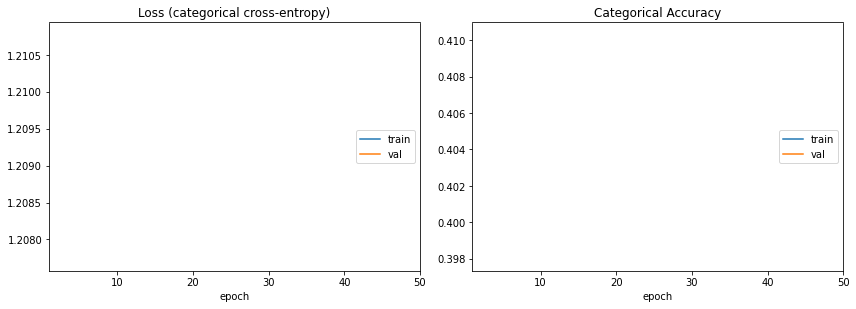

Epoch 2/50


In [ ]:
n_epochs = 50
batch_size = 256
callbacks = [
      tv.train.PlotMetricsOnEpoch(metrics_name=['Loss (categorical cross-entropy)', 'Categorical Accuracy'], 
                                  cell_size=(6,4), columns=2, iter_num=n_epochs, wait_num=1)
 ]

hist1 = model1.fit(xtrain, ytrain, epochs=n_epochs, validation_data=(xtest, ytest), verbose=1, callbacks=callbacks, batch_size=batch_size)

# **CNN With Fasttext 100Dim SkipGram Working On True Data**

---
*semantic meaning Removal*: **False**

*All Data Corpus*         :**False**

*Dimentionality Reduction*:**False**

*Number of word* = **100**






In [ ]:
originalData_df = originalData_df.query('pow == 1 | ach == 1 | aff == 1')
originalData_df = originalData_df.drop_duplicates()
originalData_df.shape

(56326, 6)

In [ ]:
tweets_corpus  = list(originalData_df.processed_Artext.dropna())
# word_punctuation_tokenizer = nltk.WordPunctTokenizer()
tweets_tokenized_corpus = [nltk.word_tokenize(sentence) for sentence in tweets_corpus]

In [ ]:
len(tweets_tokenized_corpus)

56326

In [ ]:
seq_max_length = 100 # Max number of words per sequence
embedding_dim  = 100 # embedding dimension using the language model

xall = keras.preprocessing.sequence.pad_sequences(tweets_tokenized_corpus, seq_max_length,
                                                  dtype=object, padding='post', truncating='post', value='')

gc.collect()

xall = np.expand_dims(np.array([[corpus_model.get_word_vector(str(x)) for x in row] for row in xall]), axis=3)
xall.shape

(56326, 100, 100, 1)

In [ ]:
label = ['pow','ach','aff']
yall = originalData_df[label].values
yall.shape

(56326, 3)

In [ ]:
scaler = preprocessing.StandardScaler()
xshape = xall.shape
xall = scaler.fit_transform(xall.reshape(len(xall), -1)).reshape(xshape)

In [ ]:
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(xall, yall, test_size=0.2)
xtrain.shape, ytrain.shape

((45060, 100, 100, 1), (45060, 3))

In [ ]:
model2 = keras.models.Sequential([
    keras.layers.Dropout(0.2, input_shape=(seq_max_length, embedding_dim, 1)),
    keras.layers.Convolution2D(8, kernel_size=(32, 32), activation='relu', strides=(4, 2), padding='same'), 
    keras.layers.Dropout(0.4),
    keras.layers.Convolution2D(8, kernel_size=(8, 8), activation='relu', strides=(2, 2), padding='same'), 
    keras.layers.Dropout(0.3),
    keras.layers.Convolution2D(16, kernel_size=(4, 4), activation='relu', strides=(4, 4), padding='same'), 
    keras.layers.Dropout(0.3),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'), 
    keras.layers.Dense(yall.shape[1], activation='sigmoid')
], name='model1')

model2.compile(optimizer=keras.optimizers.Adam(), #learning_rate=0.0005), 
               loss=keras.losses.CategoricalCrossentropy(from_logits=False), 
               metrics=[keras.metrics.CategoricalAccuracy()])

model2.summary()


Model: "model1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_8 (Dropout)          (None, 100, 100, 1)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 25, 50, 8)         8200      
_________________________________________________________________
dropout_9 (Dropout)          (None, 25, 50, 8)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 25, 8)         4104      
_________________________________________________________________
dropout_10 (Dropout)         (None, 13, 25, 8)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 7, 16)          2064      
_________________________________________________________________
dropout_11 (Dropout)         (None, 4, 7, 16)          0    

In [ ]:
gc.collect()

197

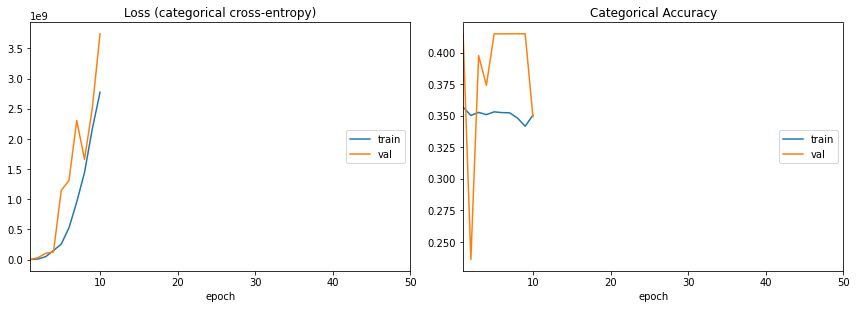

Epoch 11/50
580/705 [=======================>......] - ETA: 2:05 - loss: 3390358612.3034 - categorical_accuracy: 0.3474

KeyboardInterrupt: ignored

In [ ]:
n_epochs = 50
batch_size = 64
callbacks = [
      tv.train.PlotMetricsOnEpoch(metrics_name=['Loss (categorical cross-entropy)', 'Categorical Accuracy'], 
                                  cell_size=(6,4), columns=2, iter_num=n_epochs, wait_num=1)
 ]

hist1 = model2.fit(xtrain, ytrain, epochs=n_epochs, validation_data=(xtest, ytest), verbose=1, callbacks=callbacks, batch_size=batch_size)

# **CNN With Embedding Layer and gensim.models.fasttext Skipgram (ALL Data)**

```
 *** DATA ***
#All Data German and UD2

 *** Embedding ***
# 100dim
# skipgram
#window_size = 40
#min_word = 5
```


In [ ]:
!pip install tensorview

In [ ]:
import numpy as np
import keras
import tensorview as tv
from sklearn import model_selection, preprocessing, metrics as skm
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras import optimizers
from keras import backend as K
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D 
from keras.utils import plot_model
from keras.callbacks import EarlyStopping
from nltk.tokenize import RegexpTokenizer 
import os, re, csv, math, codecs
tokenizer = RegexpTokenizer(r'\w+')

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.4) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [ ]:
#Create Label
label = ['pow','ach','aff']
yall = MergedUD2_Germ5000Row_df[label].values
yall.shape

(146920, 3)

In [ ]:
MergedUD2_Germ5000Row_df.iloc[4]

pow                                                                 0
ach                                                                 0
aff                                                                 1
arabic_text         كان يعلم أن لديه هذه الفرصة الوحيدة إذا لم يأخ...
processed_Artext    كان يعلم أن لديه هذه الفرصة الوحيدة إذا لم يأخ...
Name: 4, dtype: object

In [ ]:
#Splite Working Data
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(MergedUD2_Germ5000Row_df.processed_Artext, yall, test_size=0.2)
xtrain.shape, ytrain.shape

((117536,), (117536, 3))

In [ ]:
xtest.shape

(29384,)

In [ ]:
#MAX_NB_WORDS Per Sentance
MAX_NB_WORDS = 100000
max_seq_len = 35  # Change

In [ ]:
#Tokenize and Convert Texts to Sequences
print("tokenizing input data...")
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, char_level=False)
tokenizer.fit_on_texts(MergedUD2_Germ5000Row_df.processed_Artext)  #leaky
word_seq_train = tokenizer.texts_to_sequences(xtrain)
word_seq_test = tokenizer.texts_to_sequences(xtest)
word_index = tokenizer.word_index
print("dictionary size: ", len(word_index))

#pad sequences
# word_seq_train = sequence.pad_sequences(word_seq_train, maxlen=max_seq_len, padding='post', truncating='post')
# word_seq_test = sequence.pad_sequences(word_seq_test, maxlen=max_seq_len, padding='post', truncating='post')

tokenizing input data...
dictionary size:  70615


In [ ]:
word_seq_train[0]

In [ ]:
#Creat Pad Sequences
word_seq_train = sequence.pad_sequences(word_seq_train, maxlen=max_seq_len, padding='post', truncating='post')
word_seq_test = sequence.pad_sequences(word_seq_test, maxlen=max_seq_len, padding='post', truncating='post')

In [ ]:
word_seq_train[0]

array([   38,   368,    19,  1941,     3,   150,     2,    49,    19,
           3,   773,   556,   323,    22,     6,  1004,    46,     1,
         131,    12,    81,     1,    11,  1166,   489,  9325, 25547,
           0,     0,     0,     0,     0,     0,     0,     0],
      dtype=int32)

In [ ]:
word_seq_train.shape, word_seq_test.shape

((117536, 35), (29384, 35))

In [ ]:
word_seq_train

array([[   38,   368,    19, ...,     0,     0,     0],
       [   92,   402,  3829, ...,     0,     0,     0],
       [   58,     7,    56, ...,     0,     0,     0],
       ...,
       [   55,     8,    12, ...,     0,     0,     0],
       [  516,     1,   519, ...,     0,     0,     0],
       [ 1298, 28820,  9638, ...,     0,     0,     0]], dtype=int32)

In [ ]:
#training params
batch_size = 128
num_epochs = 500 

#model parameters
num_filters = 255 
weight_decay = 1e-4
embedding_size = 100 # dim

In [ ]:
 len(word_index)

70615

In [ ]:
def get_word_vector(word):
  try:
    return ft_model.wv[word]
  except:
    return None

In [ ]:
#embedding matrix
print('preparing embedding matrix...')
words_not_found = []
nb_words = min(MAX_NB_WORDS, len(word_index))
embedding_matrix = np.zeros((nb_words+1, embedding_size))
for word, i in word_index.items():
    if i >= nb_words:
        continue
    embedding_vector = get_word_vector(word)
    if (embedding_vector is not None) and len(embedding_vector) > 0:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
    else:
        words_not_found.append(word)
print('number of null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

preparing embedding matrix...
number of null word embeddings: 17


In [ ]:
len(embedding_matrix)

70616

In [ ]:
print("sample words not found: ", words_not_found)
# for i in range(len(words_not_found)):
#   print(words_not_found[i])
print(len(words_not_found))

sample words not found:  ['ش', 'ن', 'ö', '€', 'ص', 'شؤم', 'شذوذ', '٪و', 'فث', 'وß', 'لß', 'زد', 'لؤلؤة', '\x7f', 'شىء']
15


In [ ]:
#CNN architecture
print("training CNN ...")
model = Sequential()
model.add(Embedding(nb_words+1, embedding_size,
          weights=[embedding_matrix], input_length=max_seq_len, trainable=False))
model.add(Conv1D(num_filters, 7, activation='relu', padding='same'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))
model.add(Conv1D(num_filters, 7, activation='relu', padding='same'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))
model.add(Conv1D(num_filters, 7, activation='relu', padding='same'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Dense(yall.shape[1], activation='sigmoid'))  #multi-label (k-hot encoding)

adam = optimizers.Adam(lr=0.000000001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

In [ ]:
#define callbacks
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, verbose=1)
callbacks = [early_stopping] 

In [ ]:
#model training
hist = model.fit(word_seq_train, ytrain, batch_size=batch_size, epochs=num_epochs, callbacks=callbacks, validation_split=0.1, shuffle=True, verbose=2)

Epoch 1/500
827/827 - 40s - loss: 0.7416 - accuracy: 0.6383 - val_loss: 0.7107 - val_accuracy: 0.7747
Epoch 2/500
827/827 - 6s - loss: 0.7417 - accuracy: 0.6394 - val_loss: 0.7105 - val_accuracy: 0.7747
Epoch 3/500
827/827 - 6s - loss: 0.7415 - accuracy: 0.6402 - val_loss: 0.7104 - val_accuracy: 0.7747
Epoch 4/500
827/827 - 6s - loss: 0.7413 - accuracy: 0.6369 - val_loss: 0.7102 - val_accuracy: 0.7747
Epoch 5/500
827/827 - 6s - loss: 0.7412 - accuracy: 0.6397 - val_loss: 0.7101 - val_accuracy: 0.7747
Epoch 00005: early stopping


In [ ]:
#Model Evaluation
modloss,modacc = model.evaluate(word_seq_test, ytest)
print(modloss)
print(modacc)

919/919 [==============================] - 3s 3ms/step - loss: 0.7104 - accuracy: 0.7765
0.7103962302207947
0.7765450477600098


#####**UnSeen Data From Peper UD1**

In [ ]:
label = ['pow','ach','aff']
ytestUD2 = UD2_Drop5000Row_df[label].values
ytestUD2.shape

(23686, 3)

In [ ]:
print("tokenizing input data...")
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, char_level=False)
tokenizer.fit_on_texts(UD2_Drop5000Row_df.processed_Artext)  #leaky
word_seq_testUD2 = tokenizer.texts_to_sequences(UD2_Drop5000Row_df.processed_Artext)

tokenizing input data...


In [ ]:
word_sword_seq_testUD2eq_test = sequence.pad_sequences(word_seq_testUD2, maxlen=max_seq_len, padding='post', truncating='post')

In [ ]:
modloss,modacc = model.evaluate(word_sword_seq_testUD2eq_test, ytestUD2)
print(modloss)
print(modacc)

741/741 [==============================] - 2s 3ms/step - loss: 0.7171 - accuracy: 0.9729
0.7171469926834106
0.9728531837463379


In [ ]:
UD2_Drop5000Arr = UD2_Drop5000Row_df.processed_Artext.values
counter = 0
for text in MergedUD2_Germ5000Row_df.processed_Artext.values:
  if text in UD2_Drop5000Arr:
    counter+=1
print("number of Similar sentances = ",counter)

number of Similar sentances =  334


##### **Prediction Function**

In [ ]:
def predict(text):
  text = Preprocess_textWithEmojisTranslated_LitePunctuations(text)
  t = []
  t.append(text)
  text = t
  del t
  print(text)
  tokenizer = Tokenizer(num_words=MAX_NB_WORDS, char_level=False)
  tokenizer.fit_on_texts(text)  #leaky
  word_seq_predict = tokenizer.texts_to_sequences(text)
  word_seq_predict = sequence.pad_sequences(word_seq_predict, maxlen=max_seq_len, padding='post', truncating='post')
  y_predect = model.predict(word_seq_predict)
  return y_predect

predict('أحب شيئا لاستعراض حتى لو لم يكتمل.')

['أحب شيئا لاستعراض حتى لو لم يكتمل ']


array([[0.51270914, 0.49168545, 0.50451505]], dtype=float32)

In [ ]:
MergedUD2_Germ5000Row_df

,pow,ach,aff,arabic_text,processed_Artext
0,0,0,0,مايكل يريد أن يذهب إلى أيرلندا على متن قارب.,مايكل يريد أن يذهب إلى أيرلندا على متن قارب
1,0,0,0,أحب شيئا لاستعراض حتى لو لم يكتمل.,أحب شيئا لاستعراض حتى لو لم يكتمل
2,0,0,0,ولديه في بوله، انه يشعر فقط.,ولديه في بوله انه يشعر فقط
3,0,0,0,فاز روبرت في اليانصيب واشترى تذكرة لرحلة حلم ع...,فاز روبرت في اليانصيب واشترى تذكرة لرحلة حلم ع...
4,0,0,1,كان يعلم أن لديه هذه الفرصة الوحيدة إذا لم يأخ...,كان يعلم أن لديه هذه الفرصة الوحيدة إذا لم يأخ...
...,...,...,...,...,...
146915,0,0,1,هناك يستمتعون الآن بالذكريات القديمة...,هناك يستمتعون الآن بالذكريات القديمة
146916,0,0,0,إنهم يزيفون التنافس,إنهم يزيفون التنافس
146917,0,0,1,بكت قليلا وسألتها كاثرين عما حدث.,بكت قليلا وسألتها كاثرين عما حدث
146918,0,0,0,كلاهما تماما في عنصرها ويشعر مع الموسيقى الك...,كلاهما تماما في عنصرها ويشعر مع الموسيقى الكل...


##### **Save Model**

In [ ]:
from keras.models import model_from_json
# serialize model to JSON
PAth = '/content/drive/MyDrive/Data/German_Data/Models/CNNEmbLayer_gensfasttextSkipgramALLData'
model_json = model.to_json()
with open(PAth+"model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights(PAth+"model.h5")
print("Saved model to disk")
 
# later...


Saved model to disk


##### **Load Model**

In [ ]:

# load json and create model
json_file = open(PAth+'model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(PAth+"model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(word_sword_seq_testUD2eq_test, ytestUD2, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 97.29%


# **CNN With Embedding Layer and gensim.models.fasttext CBOW 300Dim(ALL Data)**

```
 *** DATA ***
#All Data German and UD2

 *** Embedding ***
# 300dim
# CBOW
#window_size = 40
#min_word = 5
```


In [ ]:
!pip install tensorview

In [13]:
import numpy as np
import keras
from sklearn import model_selection, preprocessing, metrics as skm
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras import optimizers
from keras import backend as K
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D 
from keras.utils import plot_model
from keras.callbacks import EarlyStopping
from nltk.tokenize import RegexpTokenizer 
import os, re, csv, math, codecs
tokenizer = RegexpTokenizer(r'\w+')

In [14]:
#Create Label
label = ['pow','ach','aff']
yall = MergedUD2_Germ5000Row_df[label].values
yall.shape

(146920, 3)

In [15]:
#Splite Working Data
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(MergedUD2_Germ5000Row_df.processed_Artext, yall, test_size=0.2)
xtrain.shape, ytrain.shape

((117536,), (117536, 3))

In [27]:
#MAX_NB_WORDS Per Sentance
MAX_NB_WORDS = 100000
max_seq_len = 50  # Change

In [28]:
#Tokenize and Convert Texts to Sequences
print("tokenizing input data...")
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, char_level=False)
tokenizer.fit_on_texts(MergedUD2_Germ5000Row_df.processed_Artext)  #leaky
word_seq_train = tokenizer.texts_to_sequences(xtrain)
word_seq_test = tokenizer.texts_to_sequences(xtest)
word_index = tokenizer.word_index
print("dictionary size: ", len(word_index))

#pad sequences
# word_seq_train = sequence.pad_sequences(word_seq_train, maxlen=max_seq_len, padding='post', truncating='post')
# word_seq_test = sequence.pad_sequences(word_seq_test, maxlen=max_seq_len, padding='post', truncating='post')

tokenizing input data...
dictionary size:  70615


In [29]:
#Creat Pad Sequences
word_seq_train = sequence.pad_sequences(word_seq_train, maxlen=max_seq_len, padding='post', truncating='post')
word_seq_test = sequence.pad_sequences(word_seq_test, maxlen=max_seq_len, padding='post', truncating='post')

In [30]:
#training params
batch_size = 128
num_epochs = 500 

#model parameters
num_filters = 255 
weight_decay = 1e-4
embedding_size = 100 # dim

In [20]:
def get_word_vector(word):
  try:
    return ft_model.wv[word]
  except:
    return None

In [21]:
get_word_vector('اهلا')

array([-0.7662183 ,  0.98379004, -0.856356  ,  0.27266034, -0.9380533 ,
       -0.86745435,  0.13047275,  0.12932763, -1.2118471 , -0.20367375,
        0.67053765, -0.11613699, -0.41103095, -0.47680384, -0.44435993,
       -0.1939749 ,  0.00508196, -0.0310873 ,  0.18593137,  0.10671886,
        0.23234546,  0.167257  , -0.10888996, -0.21263619,  0.40896115,
       -0.26786512, -0.37696776,  0.22092573, -0.18460238,  0.16977386,
        0.31056145, -0.96333283, -0.30506468,  0.44010496,  0.02392955,
       -0.12722757, -0.03489176, -0.2866858 , -0.00227871, -0.11256752,
        0.10749926, -0.5954404 , -0.6601313 ,  0.35421556, -0.60720736,
       -0.96764106,  0.36570743,  0.86228573,  0.07146072, -0.99452627,
        0.39221957,  0.47243494,  0.572416  , -0.895724  ,  1.059279  ,
       -0.40702495, -0.25490573, -0.30285227, -0.13640803,  0.59923154,
       -0.22744136, -0.01894039,  0.8421291 ,  0.3415764 ,  0.33139372,
        0.5401708 ,  0.69443786, -0.8453227 , -0.2397006 ,  0.35

In [ ]:
#embedding matrix
print('preparing embedding matrix...')
words_not_found = []
nb_words = min(MAX_NB_WORDS, len(word_index))
embedding_matrix = np.zeros((nb_words+1, embedding_size))
for word, i in word_index.items():
    if i >= nb_words:
        continue
    embedding_vector = get_word_vector(word)
    if (embedding_vector is not None) and len(embedding_vector) > 0:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
    else:
        words_not_found.append(word)
print('number of null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

In [23]:
print("sample words not found: ", words_not_found)
# for i in range(len(words_not_found)):
#   print(words_not_found[i])
print(len(words_not_found))

sample words not found:  ['ش', 'ن', 'ö', '€', 'ص', 'شؤم', 'شذوذ', '٪و', 'فث', 'وß', 'لß', 'زد', 'لؤلؤة', '\x7f', 'شىء']
15


In [34]:
#CNN architecture
print("training CNN ...")
model = Sequential()
model.add(Embedding(nb_words+1, embedding_size,
          weights=[embedding_matrix], input_length=max_seq_len, trainable=False))
model.add(Conv1D(num_filters, 7, activation='relu', padding='same'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))
model.add(Conv1D(num_filters, 7, activation='relu', padding='same'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))
model.add(Conv1D(num_filters, 7, activation='relu', padding='same'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Dense(yall.shape[1], activation='sigmoid'))  #multi-label (k-hot encoding)

adam = optimizers.Adam(lr=0.0000001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

training CNN ...
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 100)           7061600   
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 50, 255)           178755    
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 25, 255)           0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 25, 255)           0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 25, 255)           455430    
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 12, 255)           0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 1

In [35]:
#define callbacks
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, verbose=1)
callbacks = [early_stopping] 

In [36]:
#model training
hist = model.fit(word_seq_train, ytrain, batch_size=batch_size, epochs=num_epochs, callbacks=callbacks, validation_split=0.1, shuffle=True, verbose=2)

Epoch 1/500
827/827 - 17s - loss: 0.7289 - accuracy: 0.3920 - val_loss: 0.6817 - val_accuracy: 0.1947
Epoch 2/500
827/827 - 15s - loss: 0.6977 - accuracy: 0.3518 - val_loss: 0.6652 - val_accuracy: 0.1394
Epoch 3/500
827/827 - 15s - loss: 0.6719 - accuracy: 0.3232 - val_loss: 0.6534 - val_accuracy: 0.1339
Epoch 4/500
827/827 - 15s - loss: 0.6497 - accuracy: 0.2981 - val_loss: 0.6429 - val_accuracy: 0.1314
Epoch 5/500
827/827 - 15s - loss: 0.6298 - accuracy: 0.2772 - val_loss: 0.6325 - val_accuracy: 0.1316
Epoch 6/500
827/827 - 15s - loss: 0.6112 - accuracy: 0.2616 - val_loss: 0.6211 - val_accuracy: 0.1318
Epoch 7/500
827/827 - 15s - loss: 0.5944 - accuracy: 0.2519 - val_loss: 0.6087 - val_accuracy: 0.1318
Epoch 8/500
827/827 - 15s - loss: 0.5793 - accuracy: 0.2396 - val_loss: 0.5955 - val_accuracy: 0.1318
Epoch 9/500
827/827 - 15s - loss: 0.5641 - accuracy: 0.2352 - val_loss: 0.5819 - val_accuracy: 0.1318
Epoch 10/500
827/827 - 15s - loss: 0.5507 - accuracy: 0.2314 - val_loss: 0.5690 - 

In [ ]:
#Model Evaluation
modloss,modacc = model.evaluate(word_seq_test, ytest)
print(modloss)
print(modacc)